##  Importing Libraries

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import chi2_contingency

The entire dataset represents the employment outcomes of engineering graduates with target variable as salary.The feature variables are the graduate's education background,their scores,skills etc.There are around 40 dependent variables and 4000 datapoints. The dependent variables contains both numerical and categorical data.

In [301]:
df1=pd.read_csv(r"C:\Users\Users\Downloads\data.xlsx - Sheet1.csv")

In [58]:
df1['Domain'].value_counts()

-1.000000    246
 0.622643    113
 0.538387    110
 0.486747    106
 0.744758    103
            ... 
 0.999250      1
 0.010995      1
 0.639587      1
 0.031150      1
 0.938588      1
Name: Domain, Length: 243, dtype: int64

In [59]:
df1.shape

(3998, 39)

In [60]:
df1.head(25)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,train,1027655,300000.0,6/1/14 0:00,present,system engineer,Hyderabad,m,7/2/92 0:00,89.92,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,train,947847,300000.0,8/1/14 0:00,5/1/15 0:00,java software engineer,Banglore,m,2/1/93 0:00,86.08,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,train,912934,400000.0,7/1/14 0:00,7/1/15 0:00,mechanical engineer,Bangalore,m,5/27/92 0:00,92.00,...,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470
8,train,552574,600000.0,7/1/13 0:00,present,electrical engineer,Noida,m,9/17/91 0:00,90.00,...,-1,-1,-1,-1,-1,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,train,1203363,230000.0,7/1/14 0:00,present,project engineer,Kolkata,m,6/13/93 0:00,77.00,...,-1,-1,-1,-1,-1,-1.3080,0.5454,-0.9122,0.90660,0.0973


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [62]:
df1.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [63]:
df1.describe(include='all')

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998,3.998000e+03,3.998000e+03,3998,3998,3998,3998,3998,3998,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
unique,1,NaN,NaN,81,67,419,339,2,1872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,NaN,NaN,7/1/14 0:00,present,software engineer,Bangalore,m,1/1/91 0:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3998,NaN,NaN,199,1875,539,627,3041,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.637945e+05,3.076998e+05,NaN,NaN,NaN,NaN,NaN,NaN,77.925443,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,NaN,3.632182e+05,2.127375e+05,NaN,NaN,NaN,NaN,NaN,NaN,9.850162,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,NaN,1.124400e+04,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,NaN,3.342842e+05,1.800000e+05,NaN,NaN,NaN,NaN,NaN,NaN,71.680000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,NaN,6.396000e+05,3.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,79.150000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,NaN,9.904800e+05,3.700000e+05,NaN,NaN,NaN,NaN,NaN,NaN,85.670000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400


## Univariate analysis

In [64]:
df1['Salary'].value_counts()

300000.0     293
180000.0     239
200000.0     205
325000.0     188
120000.0     165
            ... 
2050000.0      1
144000.0       1
1320000.0      1
755000.0       1
925000.0       1
Name: Salary, Length: 177, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


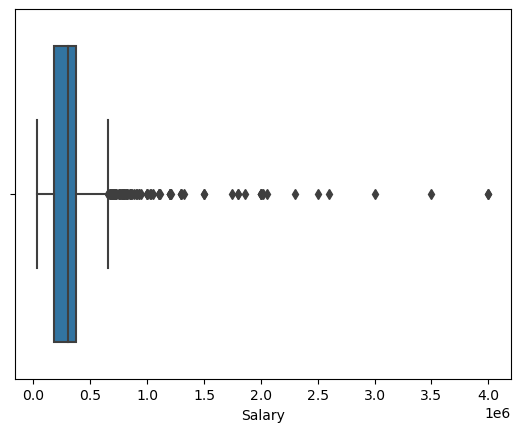

In [65]:
sns.boxplot(df1['Salary'])
plt.show()

`Insight`

Most of the employees are getting the salary upto 5lakh ,a considerable number of employees are getting in the range of 5lakh ti 15lakh and a very less number of empployees are getting above 15lakh t0 40lakh.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


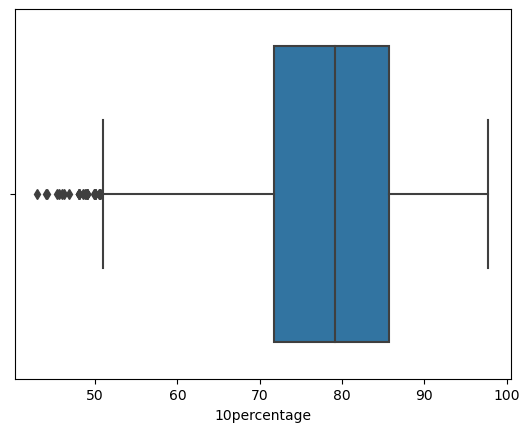

In [66]:
sns.boxplot(df1['10percentage'])
plt.show()

`Insight`
 
Maximum of the employees in Aspiring  Minds had scored 70 to 87 percentage in their SSC. Few number of employees have less than 50%. There are employees with above 90% also

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


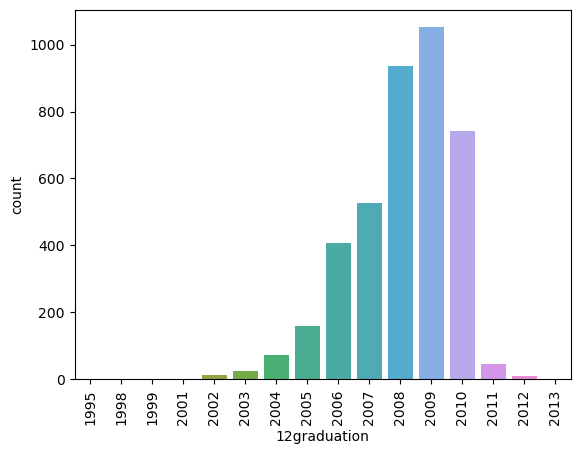

In [67]:
sns.countplot(df1['12graduation'])
plt.xticks(rotation=90,ha='center')
plt.show()

`Insight`

Above 1000 employees had completed their 12Graduation in 2009 and there are also employees who had completed their 12th in 2002 and also 2012.

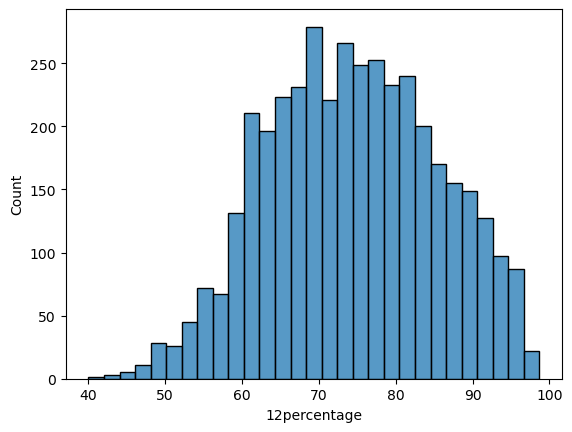

In [68]:
sns.histplot(df1['12percentage'])
plt.show()

`Insight`

From the above viusual we can infer that above 250 number of employees have
70% in their 12th. Around 150 employees had more than 90% and there a employees who have nearly 40% .But most number of employees have between 50 and 90.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


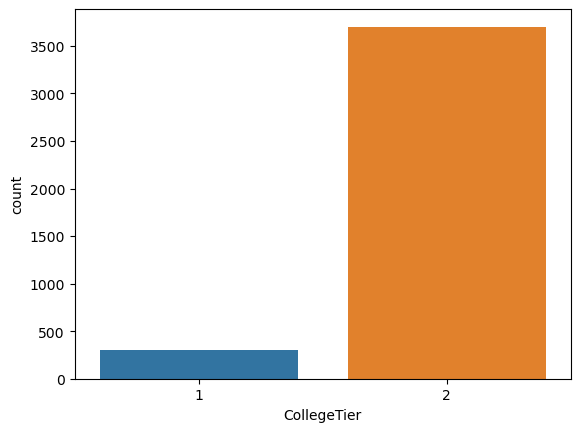

In [69]:
sns.countplot(df1['CollegeTier'])
plt.show()

`Insight`

From the above plot, we can understand that almost all the employees belong to Tier 2 colleges

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


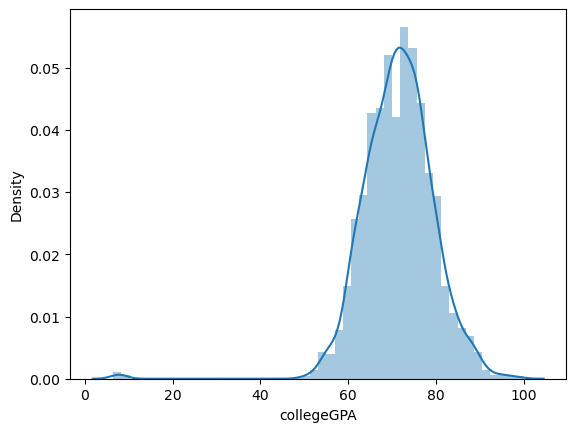

In [70]:
sns.distplot(df1['collegeGPA'])
plt.show()

`Insight`

The range of GPA of employees in between 50 and 90. 1 or 2 employees also had the GPA less than 20.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


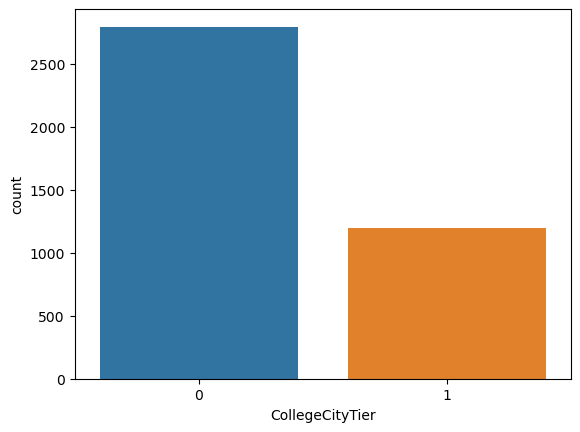

In [71]:
sns.countplot(df1['CollegeCityTier'])
plt.show()


`Insight`

Above 2500 emoployees belong to Tier 0 cities

In [72]:
df1['CollegeCityTier'].value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


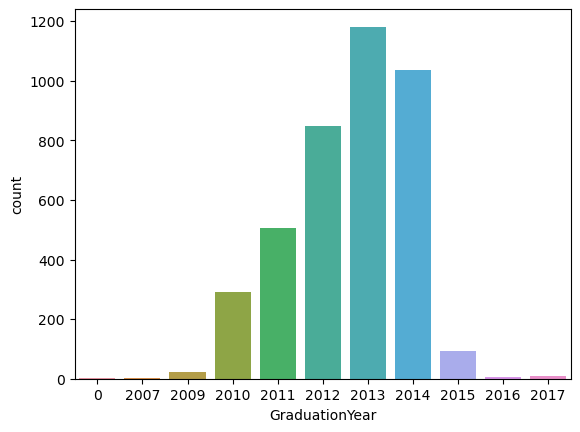

In [73]:
sns.countplot(df1['GraduationYear'])
plt.show()

`Insight`

In the company, more number of employees belong to 2013 and 2014 graduation year. The graduate students of 2007 and 2017 are also working in the company but a very less number.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


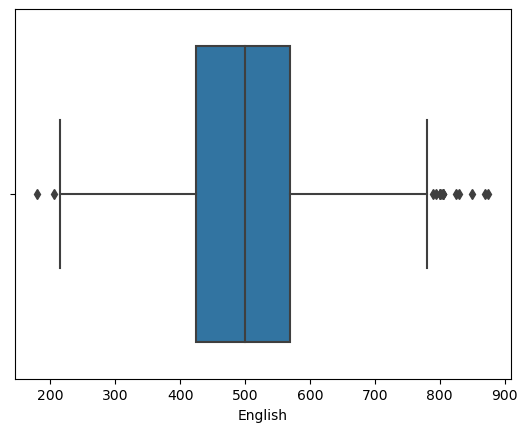

In [74]:
sns.boxplot(df1['English'])
plt.show()

`Insight`

In the English test conducted in the company, 50% of employees scored between 400 and 600. Few employeees scored exceptionally above 800 and there are employees who scored below 200 also.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


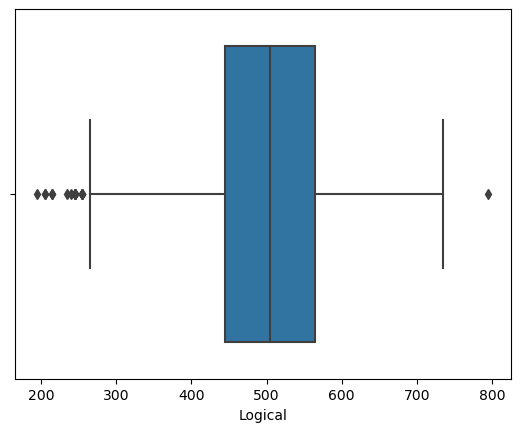

In [75]:
sns.boxplot(df1['Logical'])
plt.show()

`Insight`

In the Logical test  50% of employees scored between 450 and 600. Only 1 employee scored exceptionally above 700 and a less number of employees scored below.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


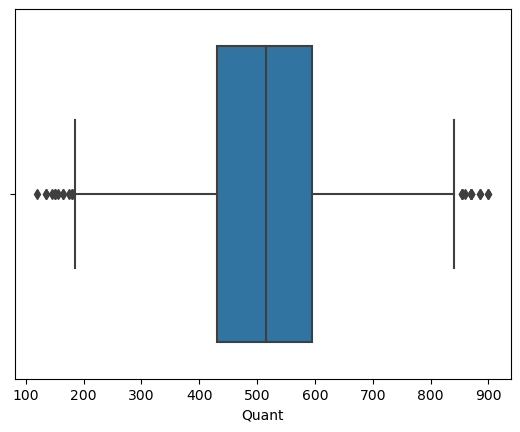

In [76]:
sns.boxplot(df1['Quant'])
plt.show()

`Insight`

In the Quantitative test conducted in the company, 50% of employees scored between 400 and 600. Few employeees scored exceptionally above 800 and there are employees who scored below 200 also.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


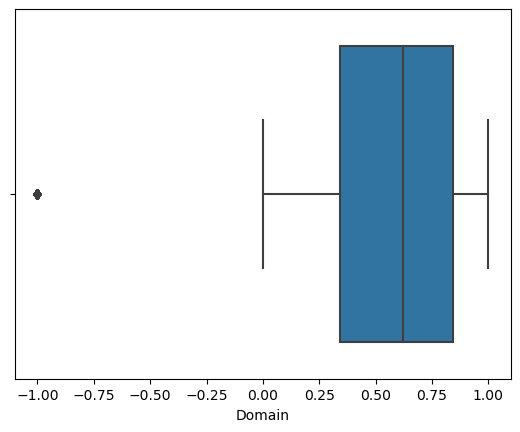

In [77]:
sns.boxplot(df1['Domain'])
plt.show()

`Insight`

In the domain test, there are some employees who had not attempted the test got -1 and those who had attempted the test scored between 0 and 1.Most of the employees scored in the range of 0.3 to 0.8.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


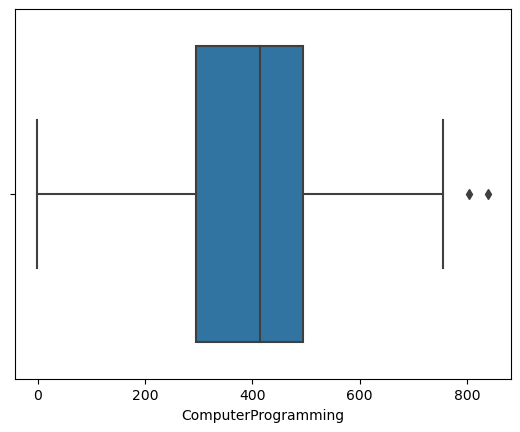

In [78]:
sns.boxplot(df1['ComputerProgramming'])
plt.show()

`Insight`

There are 2 employees who had very knowledge in computer Proramming scored above 800. Most of the employees scored in between 250 and 500.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


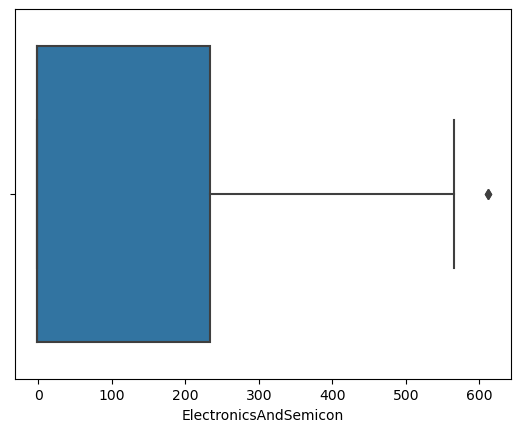

In [79]:
sns.boxplot(df1['ElectronicsAndSemicon'])
plt.show()

`Insight`

In the ElectronicsAndSemicon test conducted only one employee scored high which is 600, and the other employees scored in between 0 and 250.

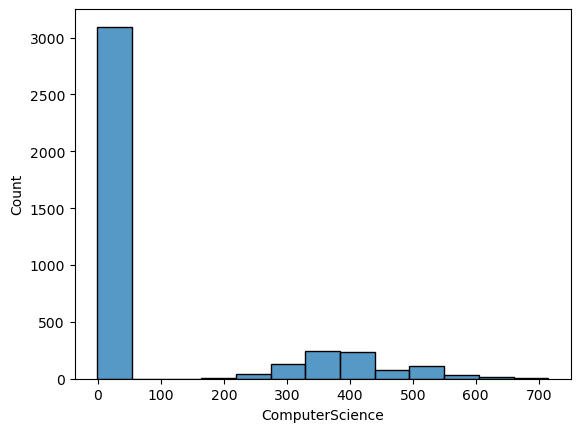

In [80]:
sns.histplot(df1['ComputerScience'])
plt.show()

`Insight`

 In the computer Science test very few employees scored between 200 and 700 and Around 3000 employees scored between 0 and 70

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


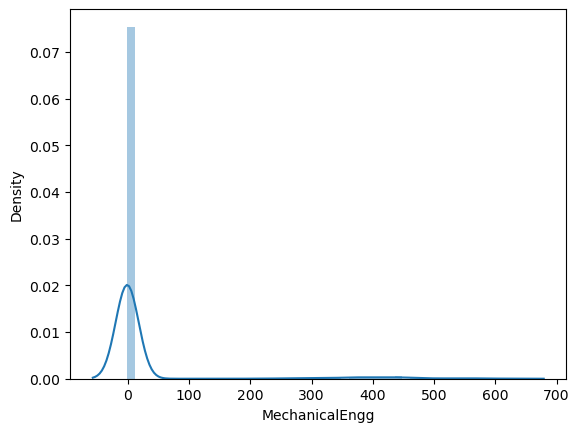

In [81]:
sns.distplot(df1['MechanicalEngg'])
plt.show()

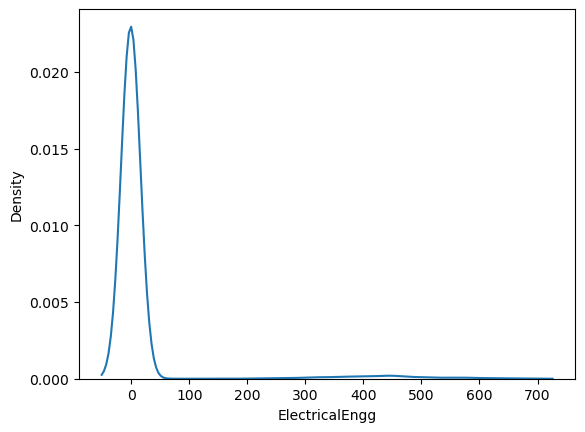

In [82]:
sns.kdeplot(df1['ElectricalEngg'])
plt.show()

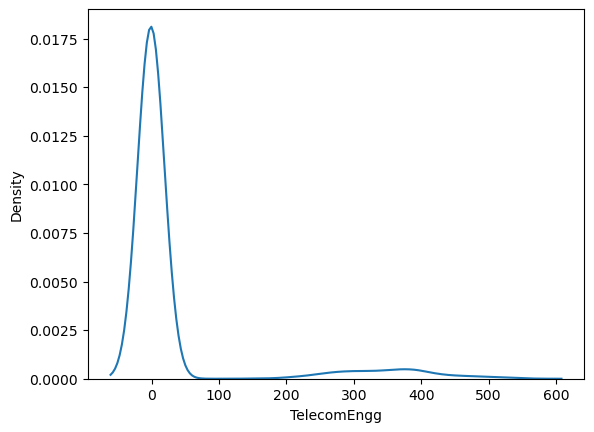

In [83]:
sns.kdeplot(df1['TelecomEngg'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


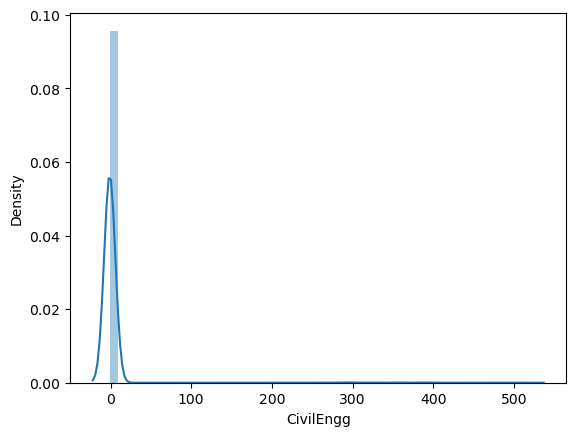

In [84]:
sns.distplot(df1['CivilEngg'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


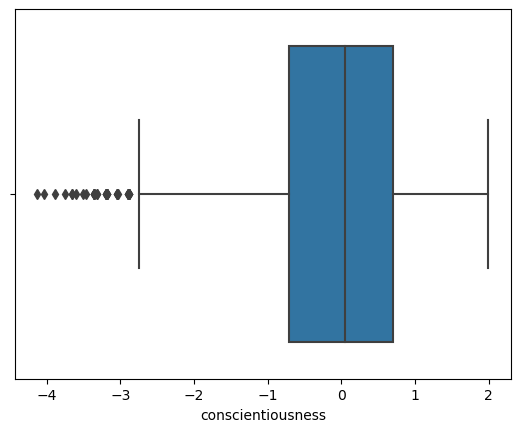

In [85]:
sns.boxplot(df1['conscientiousness'])
plt.show()

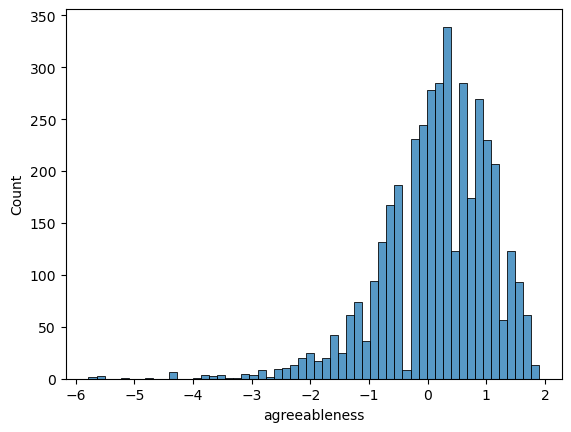

In [86]:
sns.histplot(df1['agreeableness'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


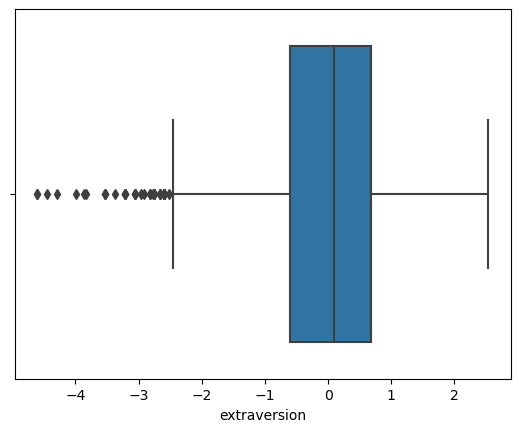

In [87]:
sns.boxplot(df1['extraversion'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


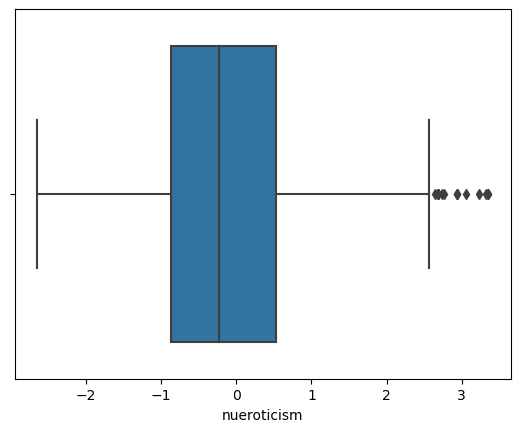

In [88]:
sns.boxplot(df1['nueroticism'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


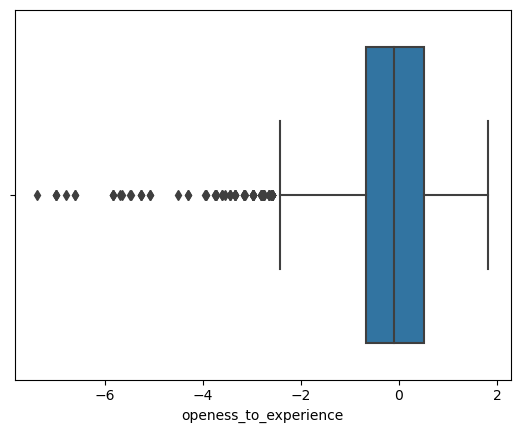

In [89]:
sns.boxplot(df1['openess_to_experience'])
plt.show()

In [90]:
df1['DOJ'].value_counts()

7/1/14 0:00     199
6/1/14 0:00     180
8/1/14 0:00     178
9/1/14 0:00     142
1/1/14 0:00     142
               ... 
11/1/15 0:00      1
11/1/09 0:00      1
8/1/04 0:00       1
9/1/09 0:00       1
2/1/07 0:00       1
Name: DOJ, Length: 81, dtype: int64

In [91]:
df1['DOJ']=pd.to_datetime(df1['DOJ'])

In [92]:
df1['DOJ']=df1['DOJ'].dt.year

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


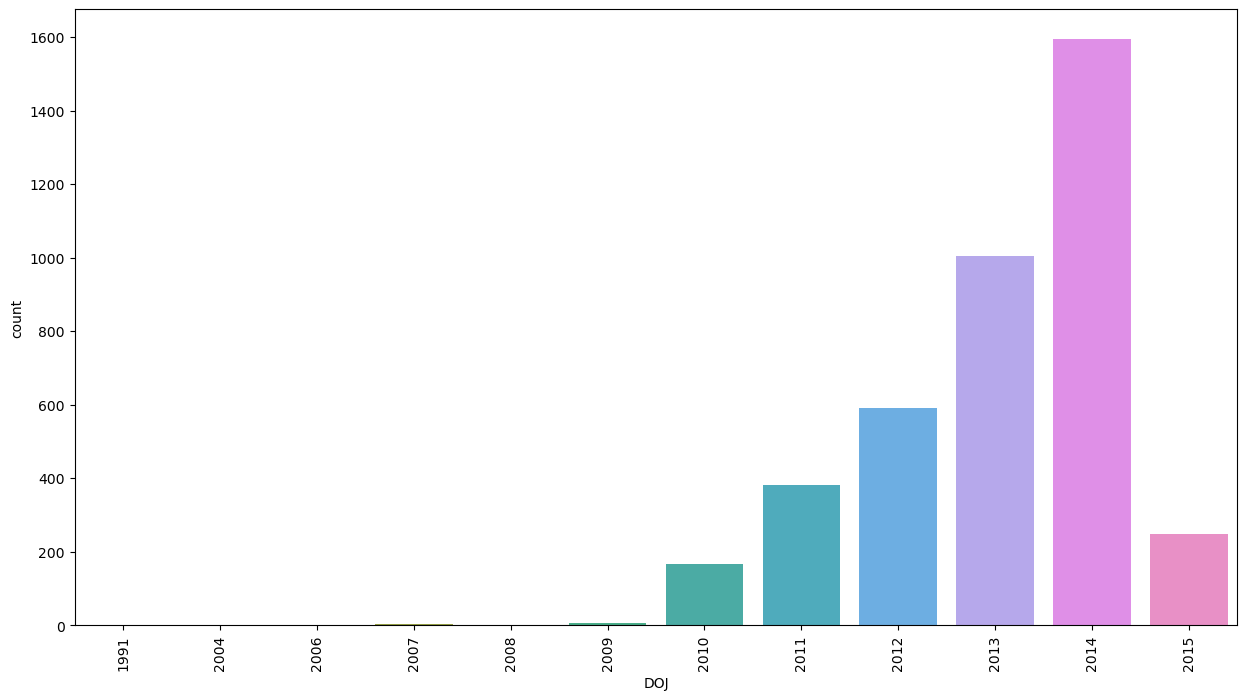

In [93]:
plt.figure(figsize=(15,8))
sns.countplot(df1['DOJ'])
plt.xticks(rotation=90,ha='center')
plt.show()

`Insight`  

Most of the employees in the company joined in 2014 followed by 2013. Very less number of employees joined in the year 2009.

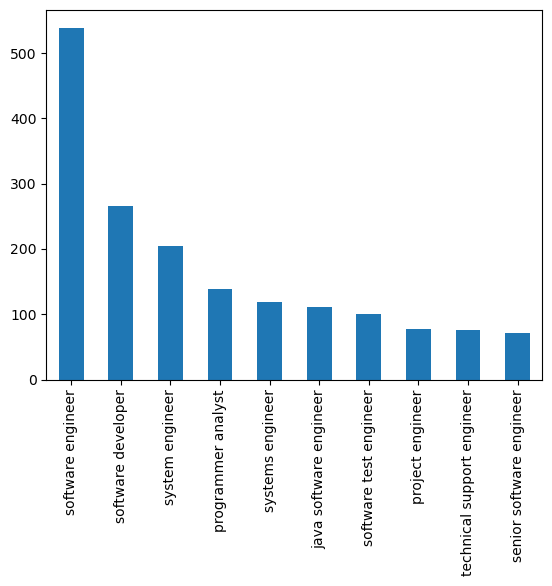

In [94]:
df1['Designation'].value_counts().head(10).plot(kind='bar')
plt.show()

`Insight`

In the company which is having more than 400 Designations, Maximum number of employees belong to Software Engineer ,software developer and all the roles belonging to software field.

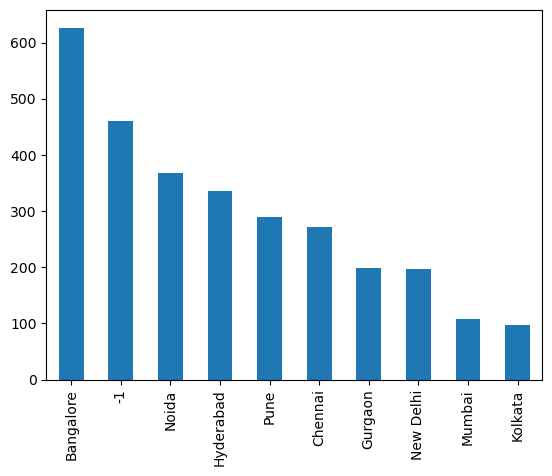

In [95]:
df1['JobCity'].value_counts().head(10).plot(kind='bar')
plt.show()

`Insight`

Around 600 employees are working in Bangalore.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


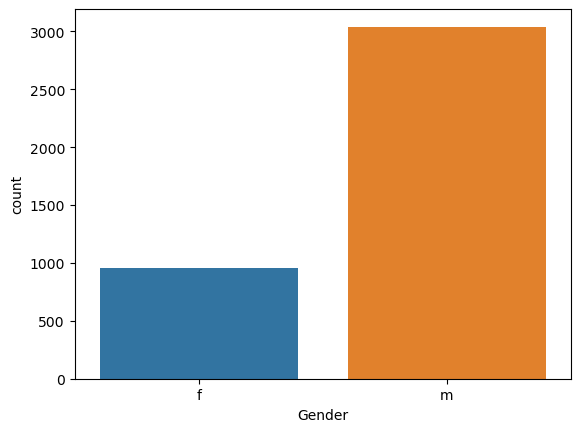

In [366]:
sns.countplot(df1['Gender'])
plt.show()

`Insight`

Out of 3998 employees, Almost 3000 employees are male and remaining are female. The ratio of male is higher the female.

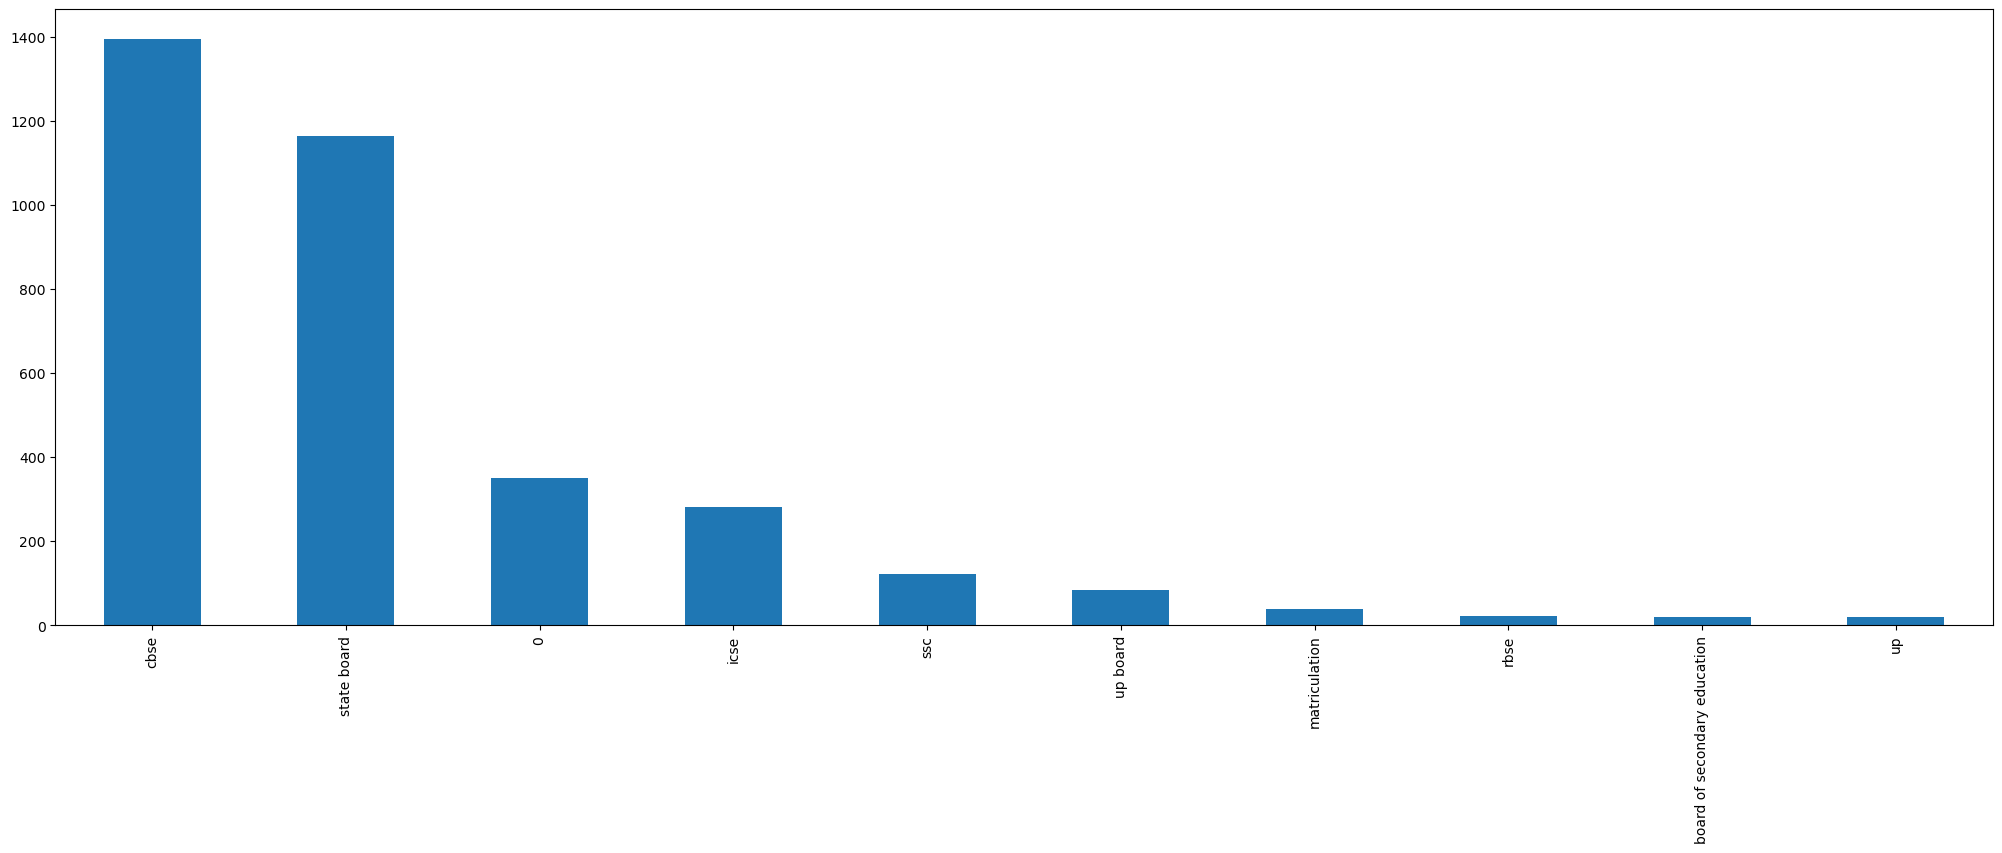

In [160]:
plt.figure(figsize=(25,8))
df1['10board'].value_counts().head(10).plot(kind='bar')
plt.show()

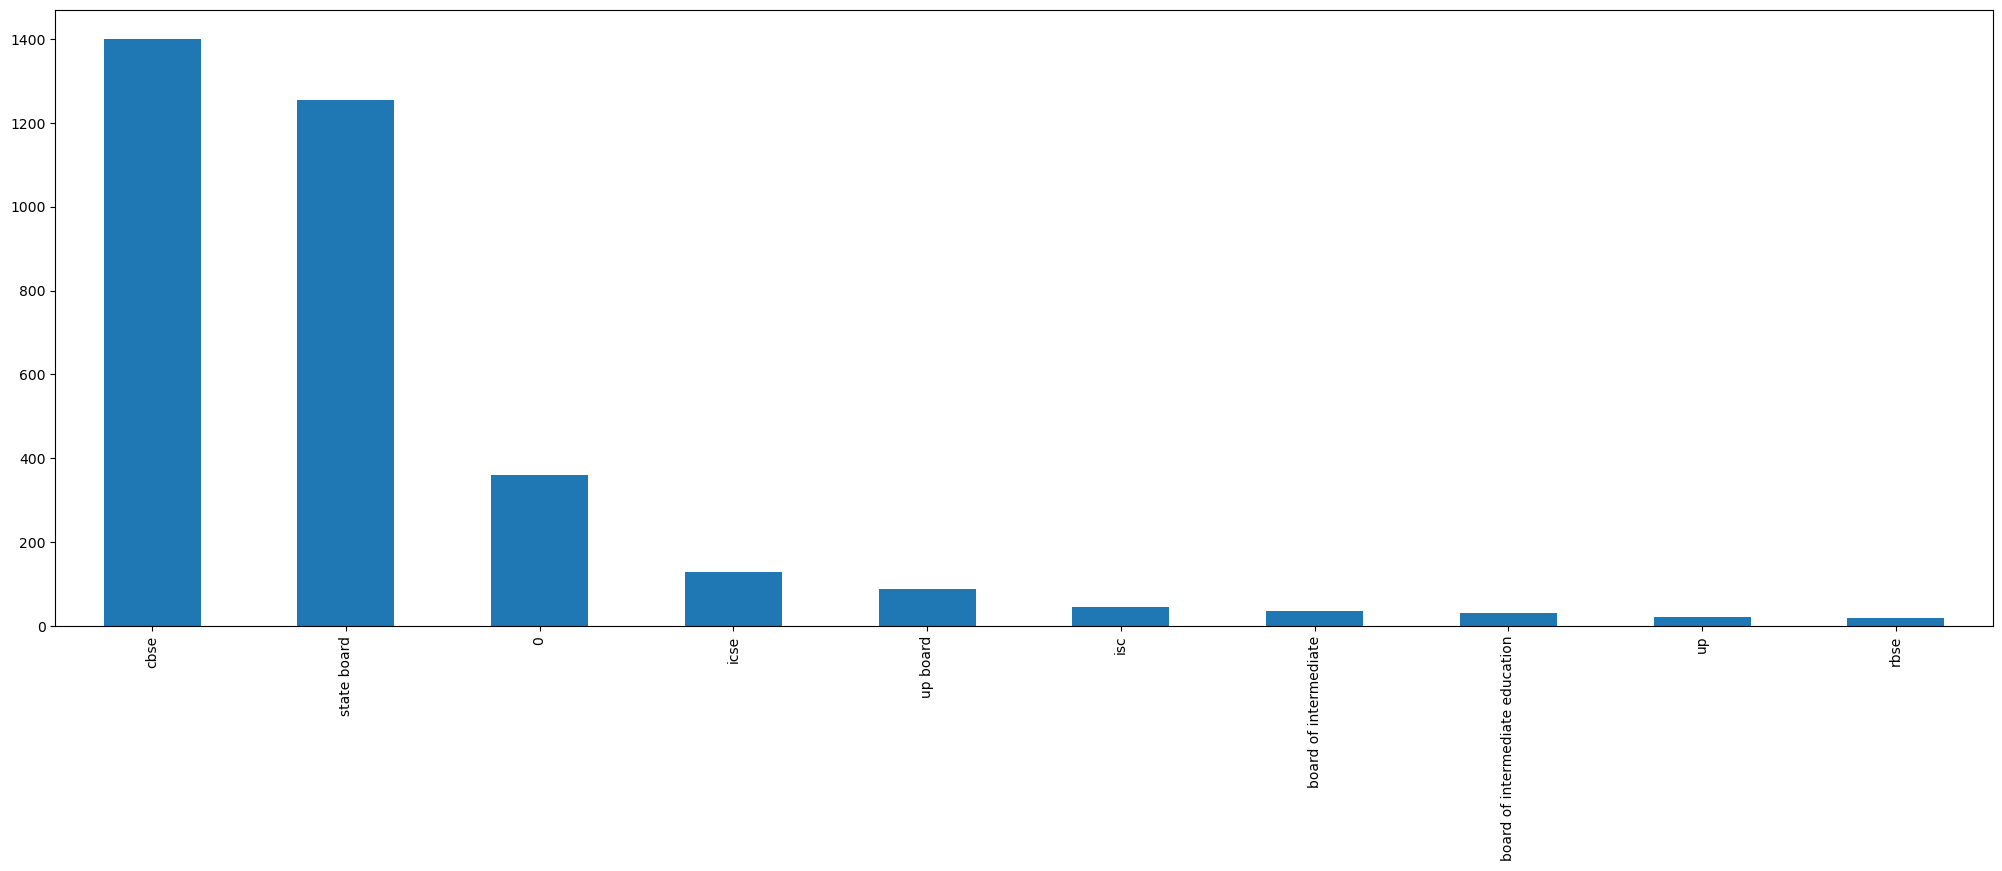

In [98]:
plt.figure(figsize=(25,8))
df1['12board'].value_counts().head(10).plot(kind='bar')
plt.show()

`Insight`

Most of the employees who are working the Aspiring minds had completed their 10th and 12th in CBSE.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


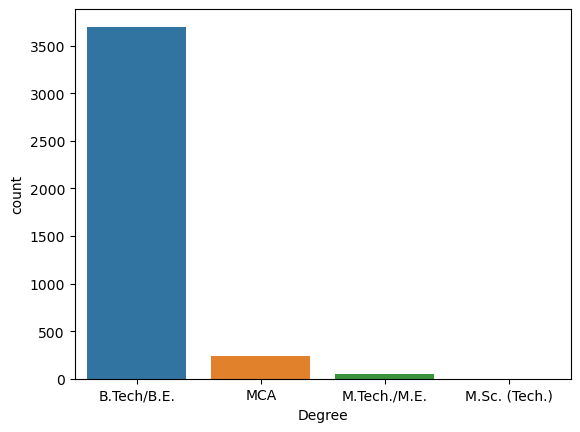

In [99]:
sns.countplot(df1['Degree'])
plt.show()

`Insight`

The background of almost all the employees is Btech or BE.

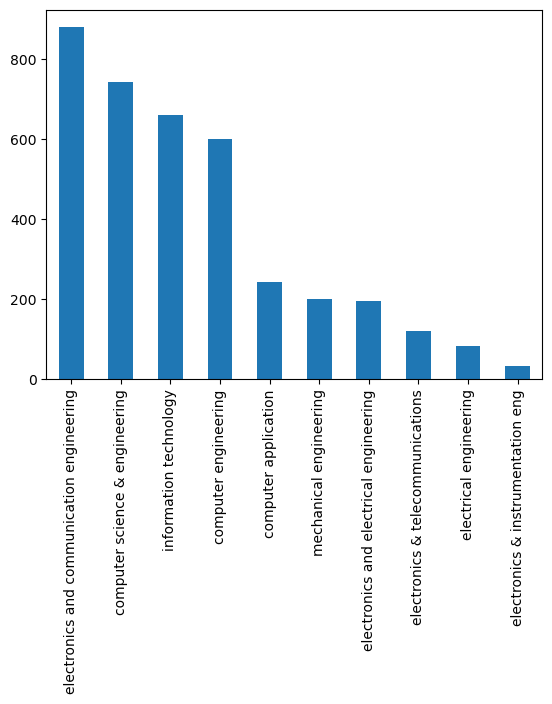

In [100]:
df1['Specialization'].value_counts().head(10).plot(kind='bar')
plt.show()

`Insight`

The most employees belong to ECE, CS, IT backgrounds.

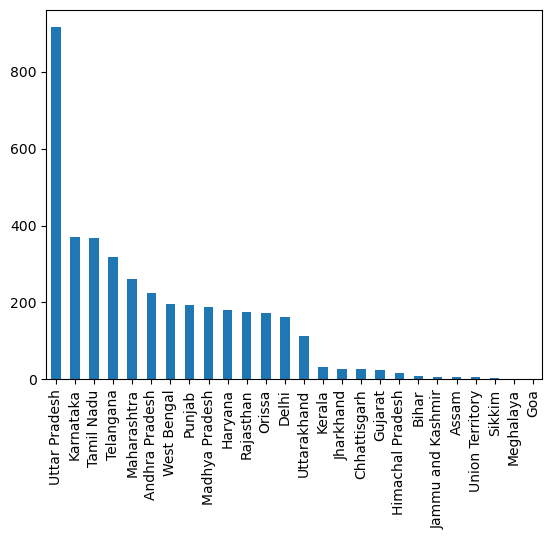

In [101]:
df1['CollegeState'].value_counts().plot(kind='bar')
plt.show()

`Insight`

Around 1000 employees in the company had completed their graduation from Uttar pradesh state. Arounfd 400 from Karnataka and Tamilnadu followed by Telangana.

## Bivariate Analysis

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


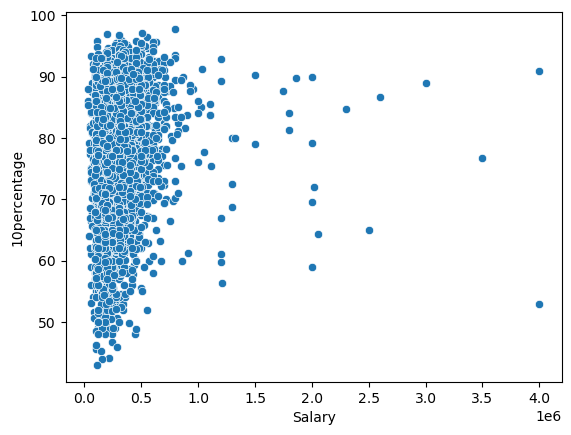

In [103]:
sns.scatterplot(df1['Salary'],df1['10percentage'])
plt.show()

`Insight`

The salary range of employees is not varying with their 10th percentage. It is almost all same for the employees who got high score and low score in their 10th.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


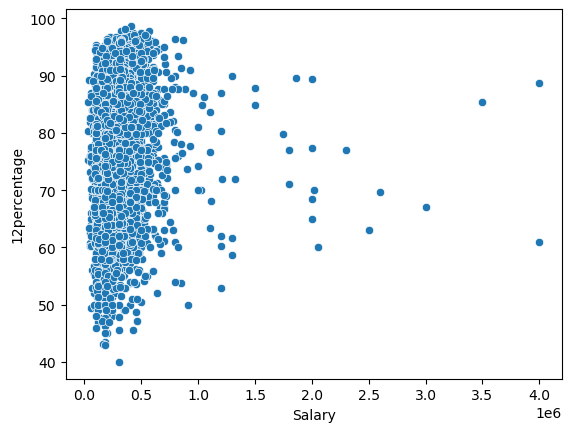

In [104]:
sns.scatterplot(df1['Salary'],df1['12percentage'])
plt.show()

`Insight`

The salary range of employees is not varying with their 12th percentage. It is almost all same for the employees who got high score and low score in their 12th.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


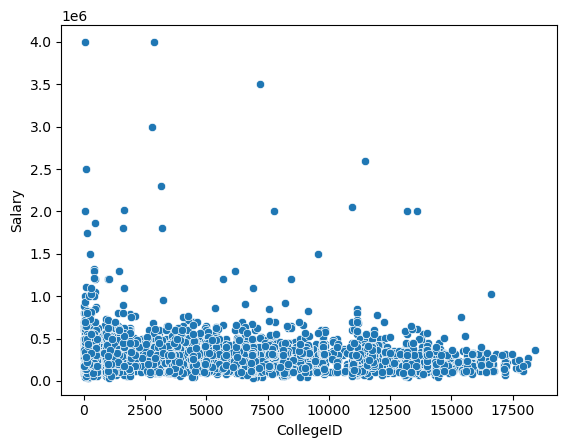

In [105]:
sns.scatterplot(df1['CollegeID'],df1['Salary'])
plt.show()

`Insight`

The salary range of employees is not varying with their collegeId. It is almost all same for the employees having different collegeIDs

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


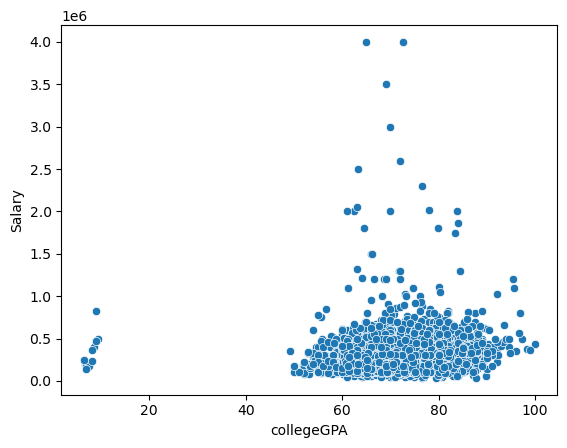

In [106]:
sns.scatterplot(df1['collegeGPA'],df1['Salary'])
plt.show()

`Insight`

The employees had scored more than 50% in their graduation, but the salary of them is not varying with their Graduation percentage. 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


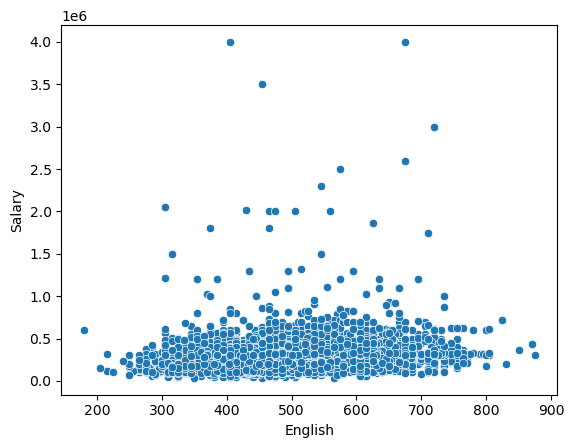

In [107]:
sns.scatterplot(df1['English'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


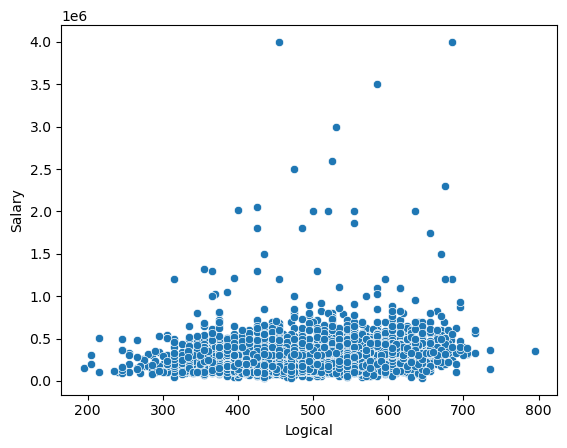

In [108]:
sns.scatterplot(df1['Logical'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


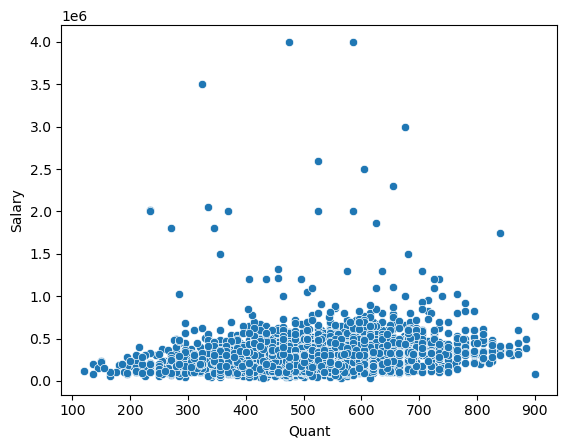

In [109]:
sns.scatterplot(df1['Quant'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


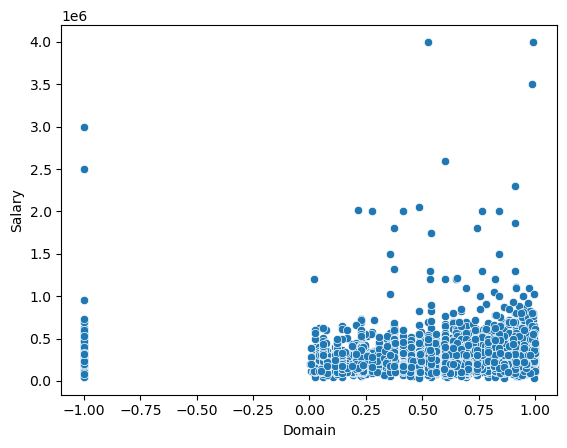

In [110]:
sns.scatterplot(df1['Domain'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


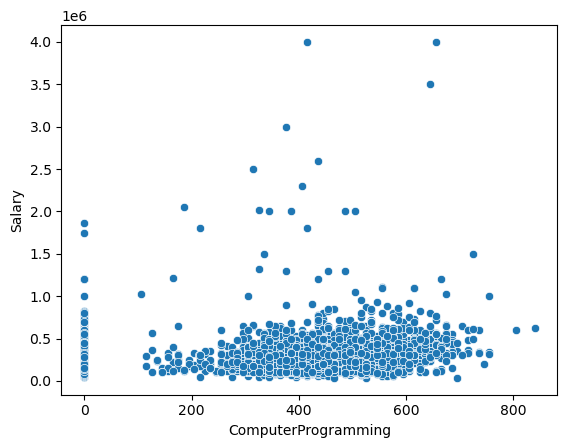

In [111]:
sns.scatterplot(df1['ComputerProgramming'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


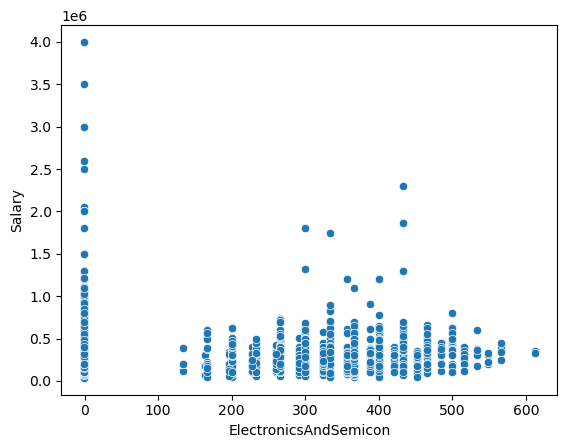

In [112]:
sns.scatterplot(df1['ElectronicsAndSemicon'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


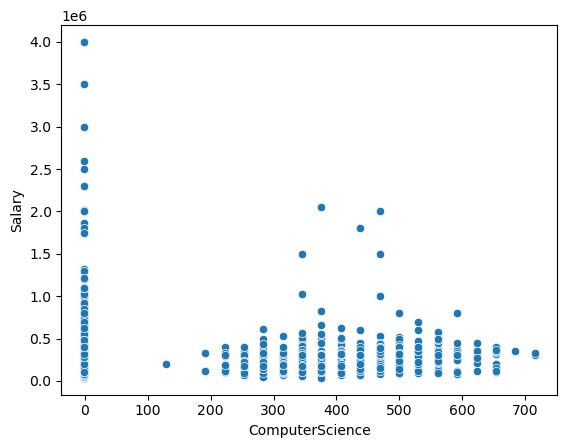

In [113]:
sns.scatterplot(df1['ComputerScience'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


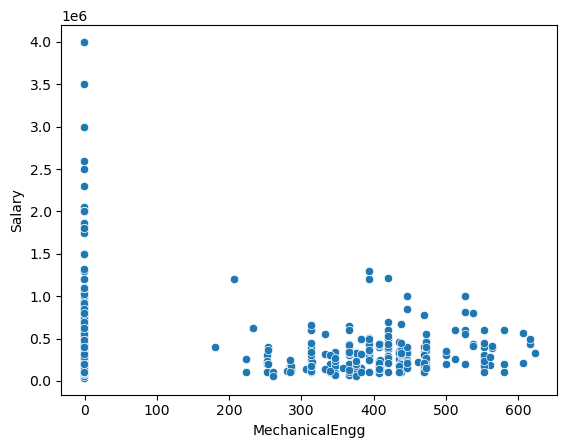

In [114]:
sns.scatterplot(df1['MechanicalEngg'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


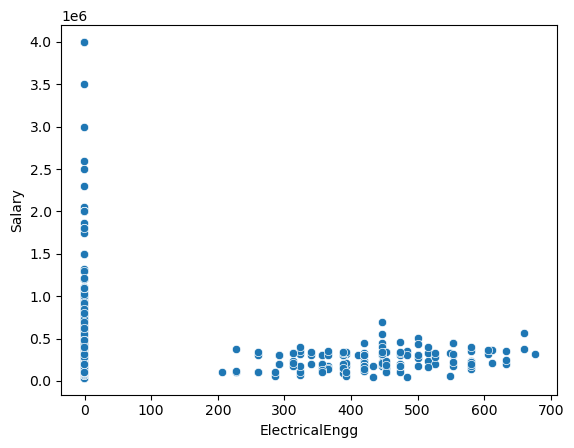

In [115]:
sns.scatterplot(df1['ElectricalEngg'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


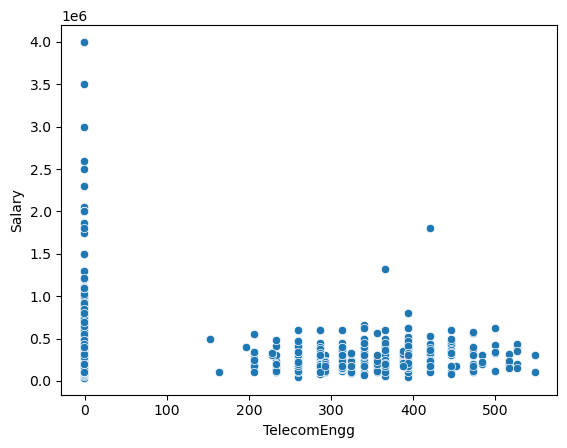

In [116]:
sns.scatterplot(df1['TelecomEngg'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


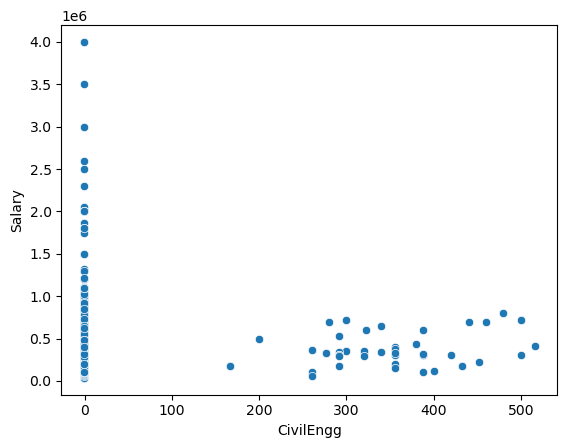

In [117]:
sns.scatterplot(df1['CivilEngg'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


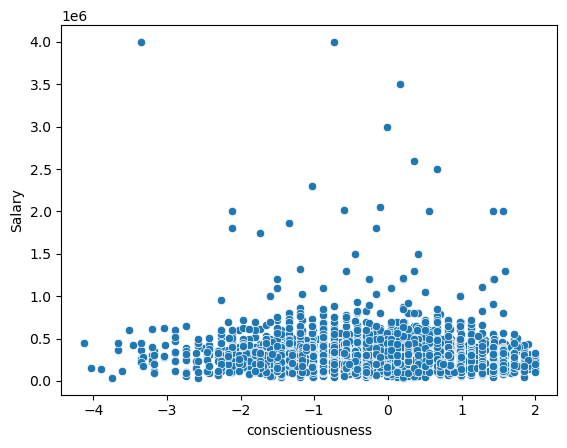

In [118]:
sns.scatterplot(df1['conscientiousness'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


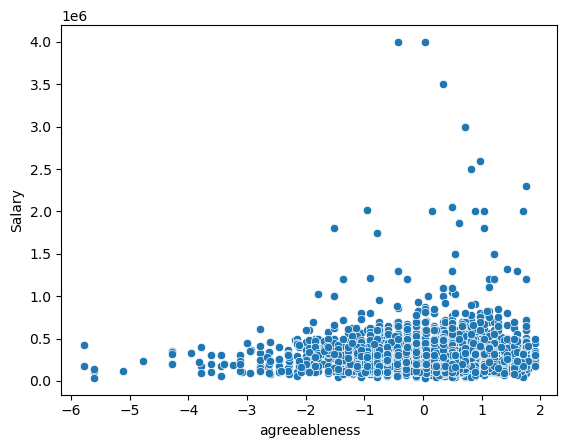

In [119]:
sns.scatterplot(df1['agreeableness'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


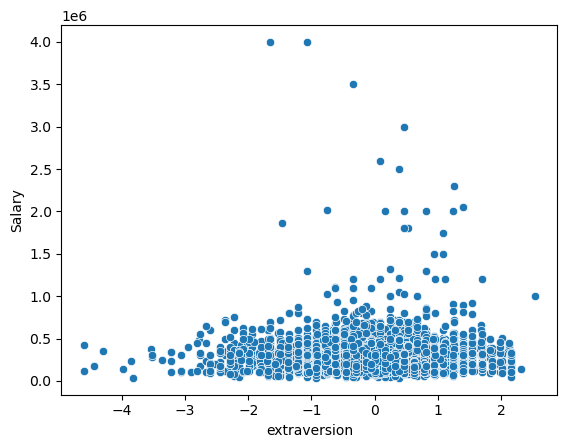

In [120]:
sns.scatterplot(df1['extraversion'],df1['Salary'])
plt.show()

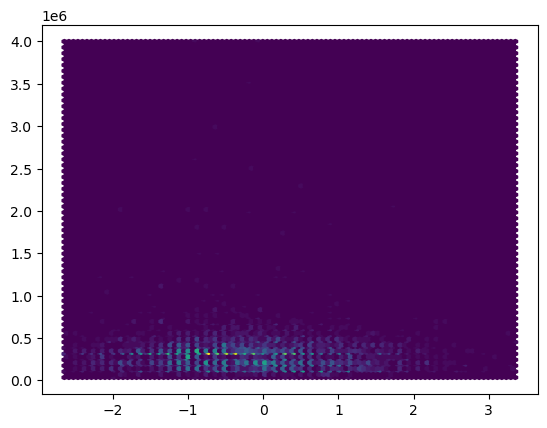

In [121]:
plt.hexbin(df1['nueroticism'],df1['Salary'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


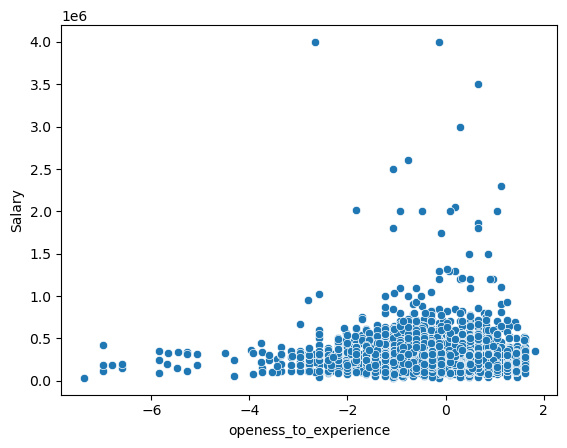

In [122]:
sns.scatterplot(df1['openess_to_experience'],df1['Salary'])
plt.show()

`Insight`

From the above visuals we can infer that the salary of the employees is not varying or dependent on the features that have test scores or the 10th and 12th graduation scores.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


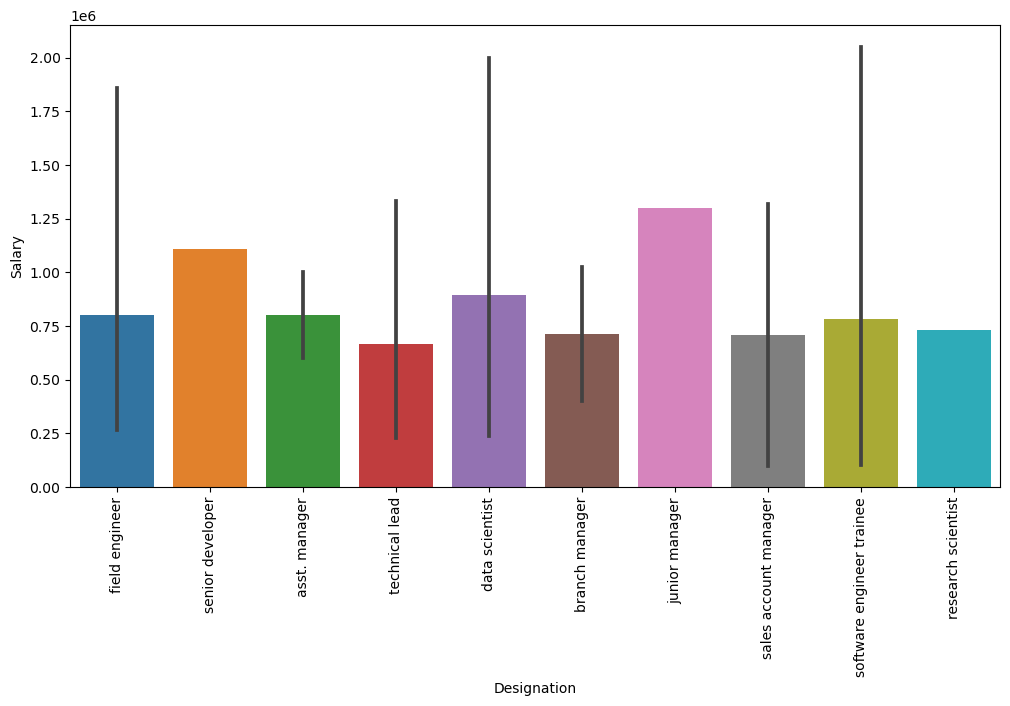

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
top_designations = df1.groupby('Designation')['Salary'].mean().nlargest(10).index
df_top5 = df1[df1['Designation'].isin(top_designations)]

plt.figure(figsize=(12, 6))
sns.barplot(df_top5['Designation'],df_top5['Salary'])
plt.xticks(rotation=90, ha='center')
plt.show()



`Insight`

The average salary is varying with the designation. Average salary is high in Junior manager  followed by senior developer. From the above visual we can infer that the salary is varying with respect to the designation.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


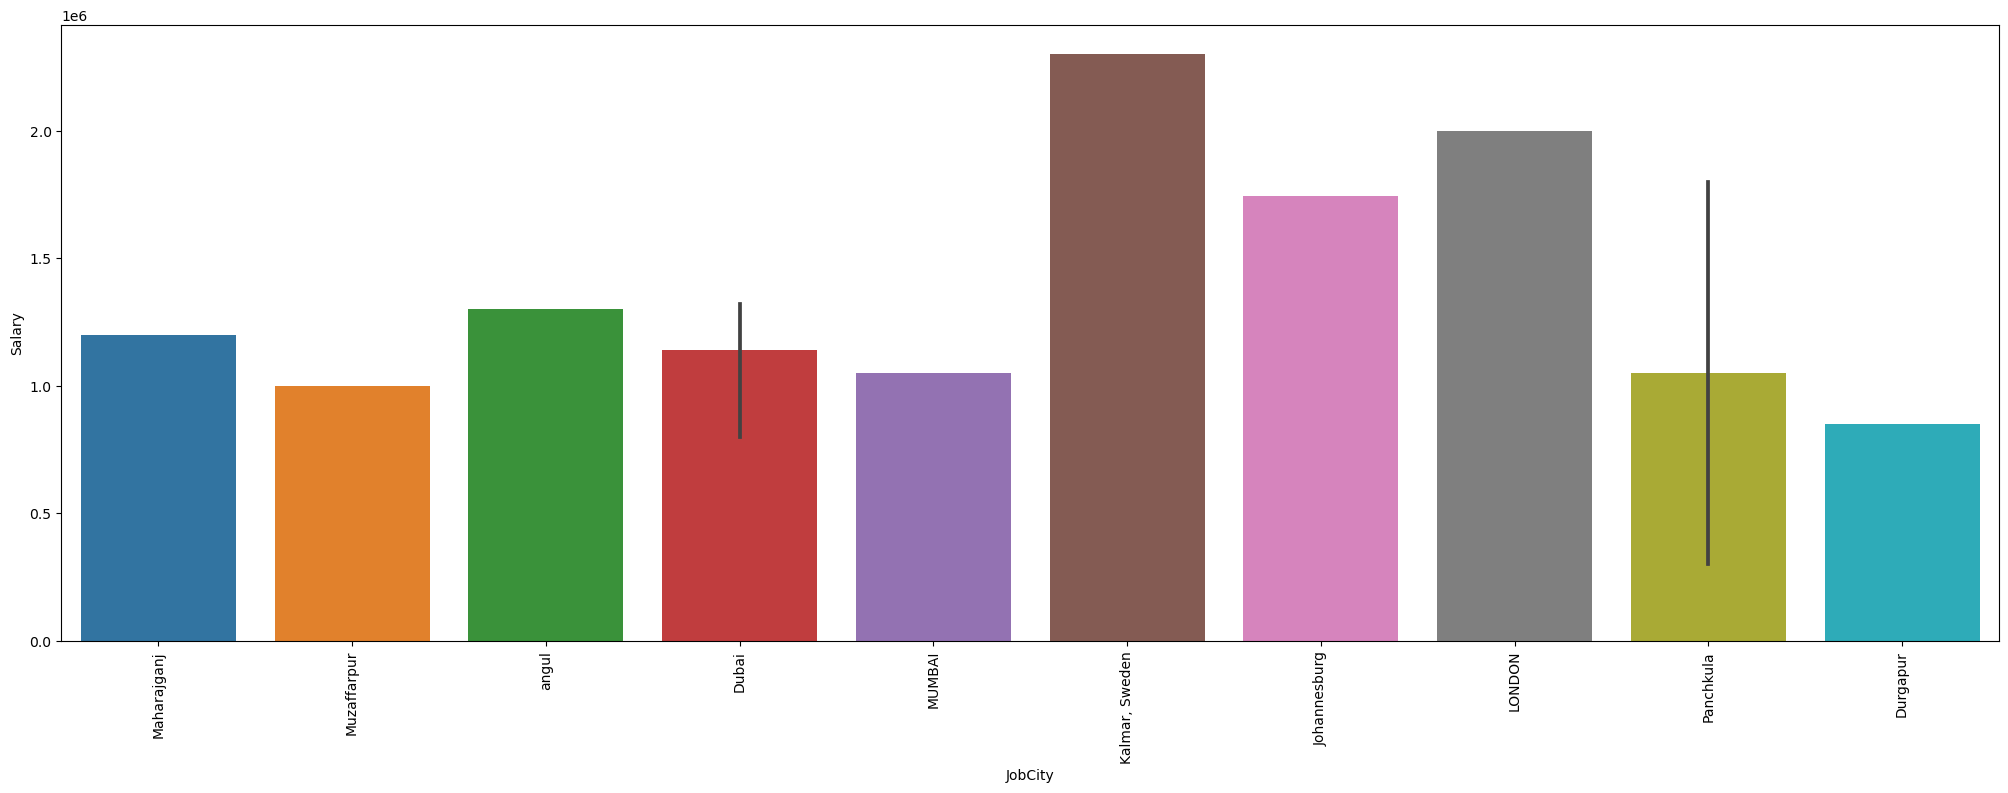

In [124]:
plt.figure(figsize=(25,8))
top5_cities=df1.groupby('JobCity')['Salary'].mean().nlargest(10).index
df_top5_cities=df1[df1['JobCity'].isin(top5_cities)]
sns.barplot(df_top5_cities['JobCity'],df_top5_cities['Salary'])
plt.xticks(rotation=90,ha='center')
plt.show()


`Insight`

The salary is higher in Sweden comparing to all the cities followed by London. Job city obviously effects the salary depdending upon the value of their currency. It is proved in the above visual. 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


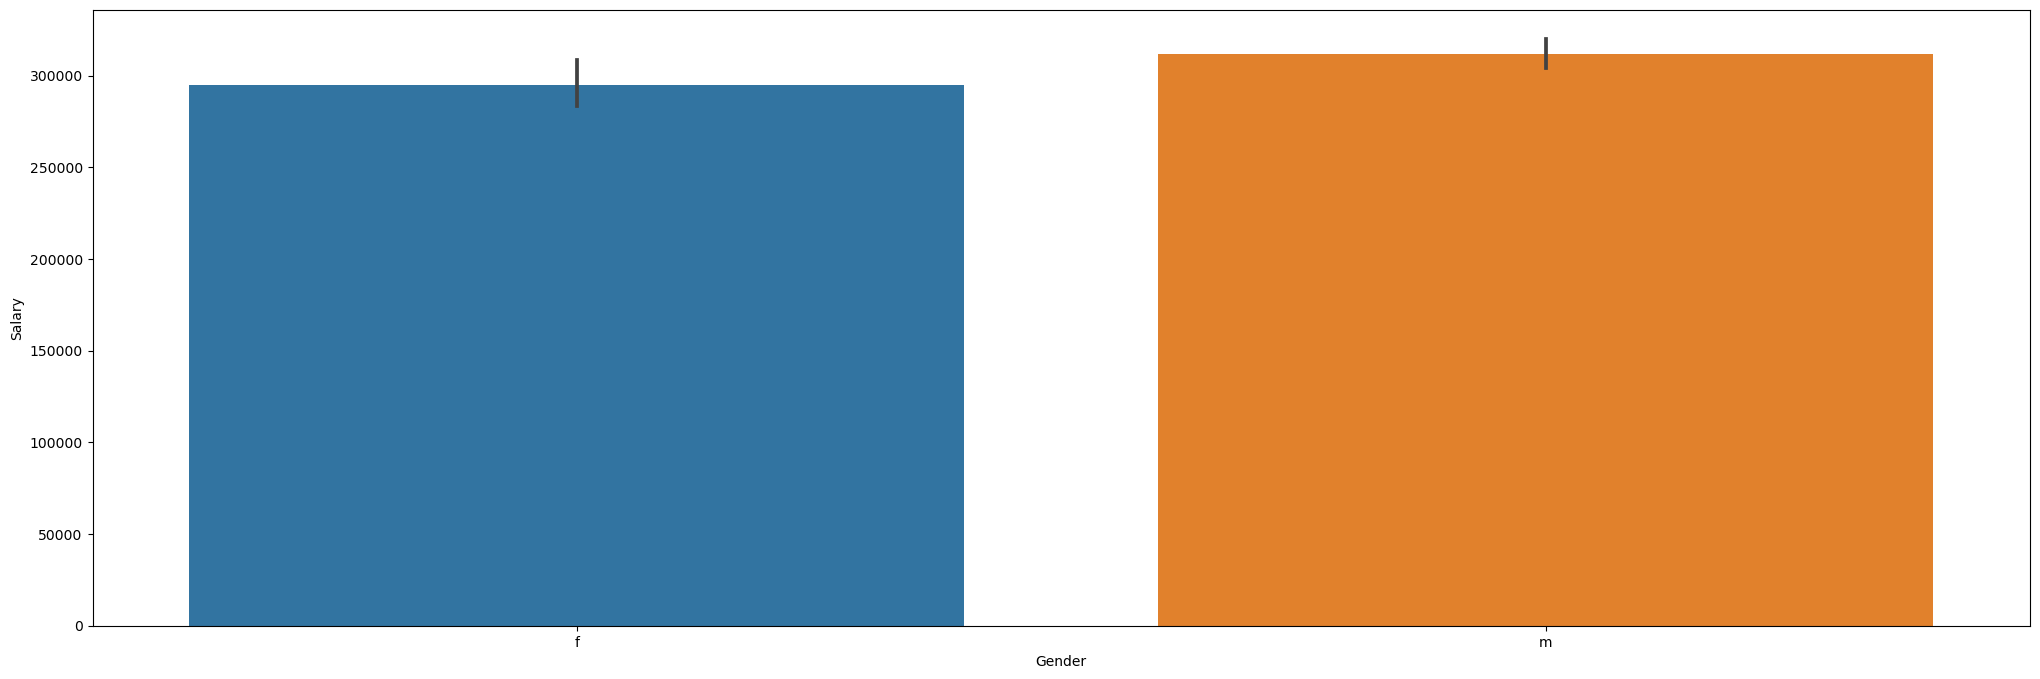

In [365]:
plt.figure(figsize=(25,8))
sns.barplot(df1['Gender'],df1['Salary'])
plt.show()

`Insight`

The salary is more for male comparing to female.


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


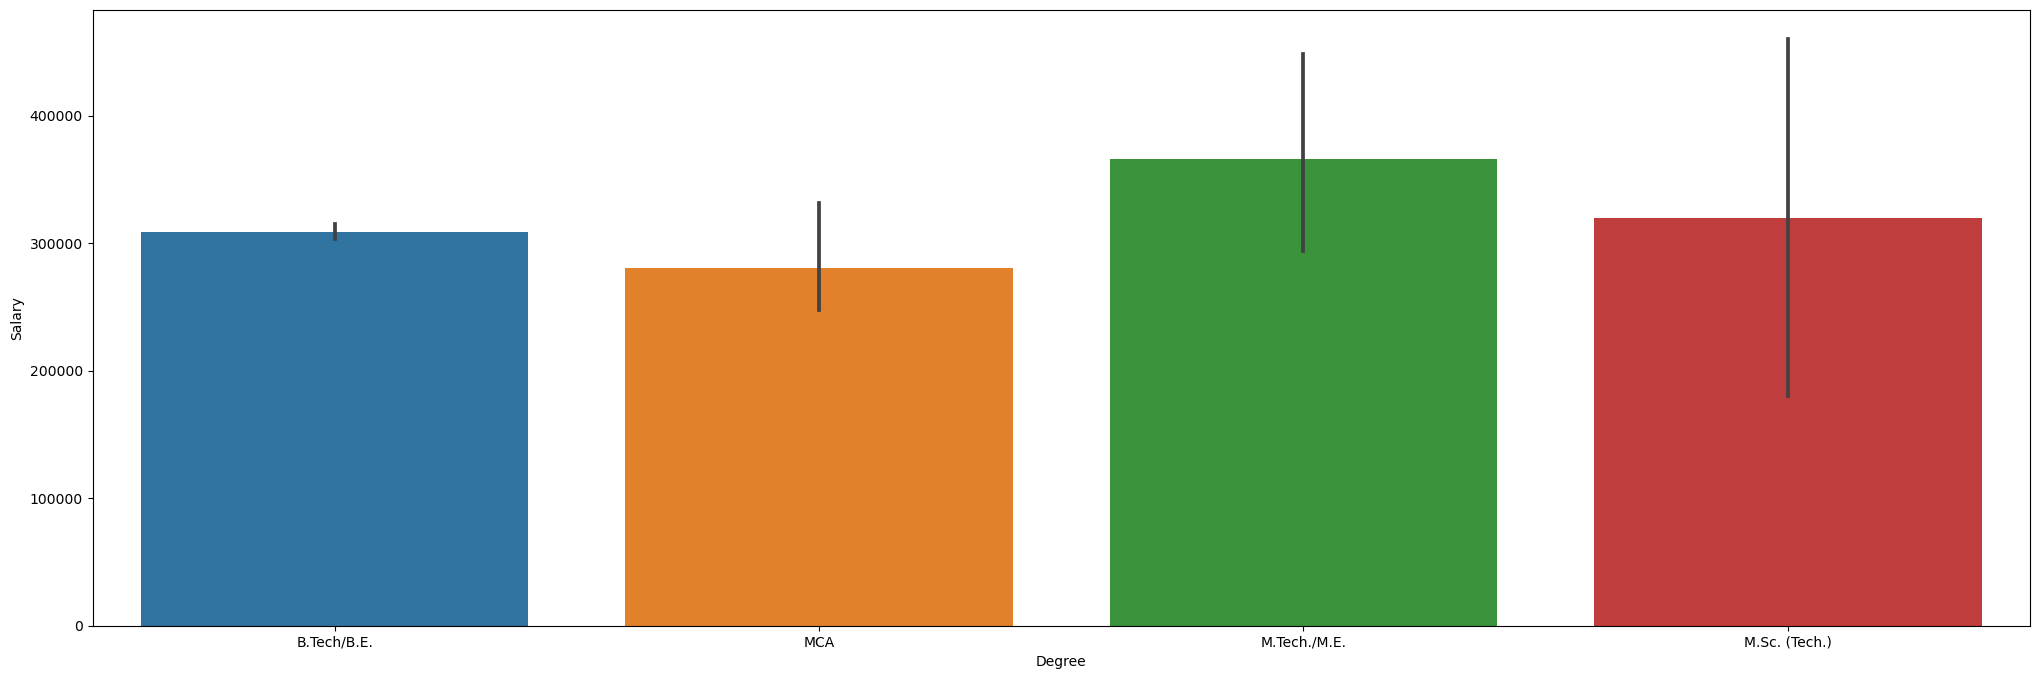

In [127]:
plt.figure(figsize=(25,8))
sns.barplot(df1['Degree'],df1['Salary'])
plt.show()

`Insight`

The salary is different for each Degree. For the employees with higher degree like ME/MTech are with higher salary followed by MSc and the least salary is for MCA employees.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


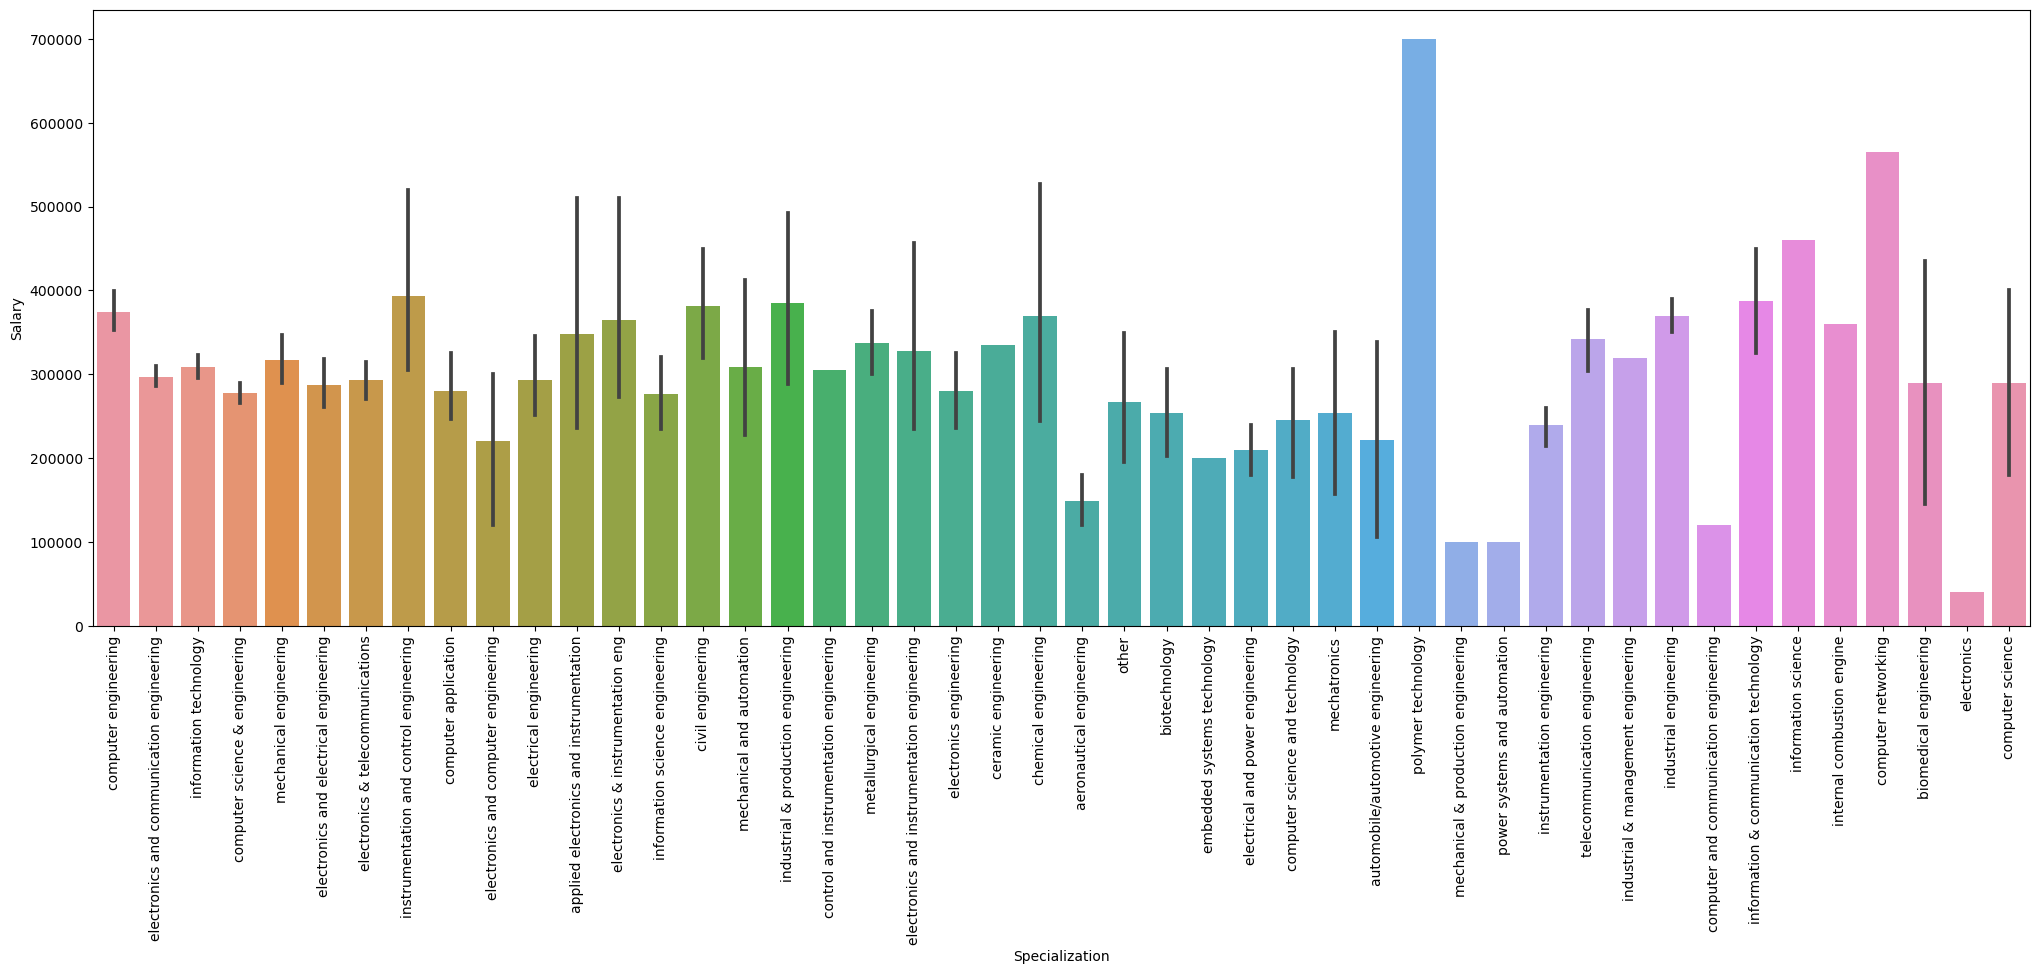

In [128]:
plt.figure(figsize=(25,8))
sns.barplot(df1['Specialization'],df1['Salary'])
plt.xticks(rotation=90,ha='center')
plt.show()

`Insight`

The higher salary is recorded for the employees who have specialization in Polymer Technology with 700000 followed by computer networking.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


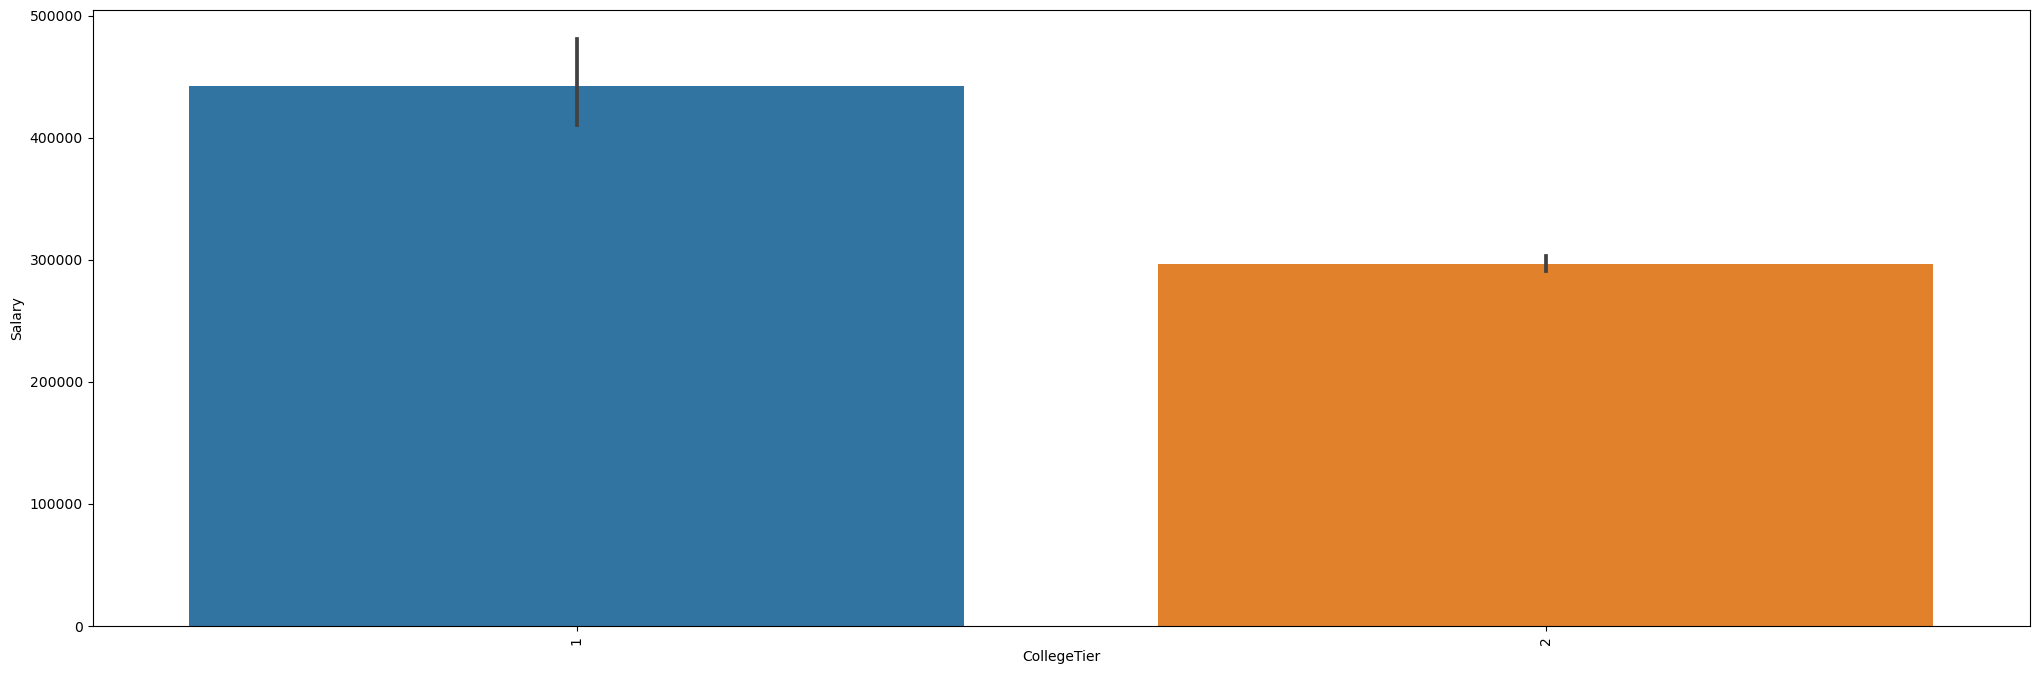

In [129]:
plt.figure(figsize=(25,8))
sns.barplot(df1['CollegeTier'],df1['Salary'])
plt.xticks(rotation=90,ha='center')
plt.show()

`Insight`

The salary is varying with the collegeTier. The employees who had graduated in Tier 1 college has the higher salary comparing to the Tier 2 college.

## Research questions

In [303]:
df1=pd.read_csv(r"C:\Users\LENOVO\Downloads\data.xlsx - Sheet1.csv")

In [304]:
df1.loc[df1['DOL']=='present','DOL']='22/2/2024'

In [305]:
df1['DOJ']=pd.to_datetime(df1['DOJ'])
df1['DOL']=pd.to_datetime(df1['DOL'])

In [306]:
df1['Exp']=((df1['DOL'].dt.year)-(df1['DOJ'].dt.year))

0       12
1       11
2       10
3       13
4        1
        ..
3993     1
3994     0
3995    11
3996     1
3997    11
Name: Exp, Length: 3998, dtype: int64

In [310]:
df1_f=df1.loc[df1['Exp']==0]

In [311]:
df1_f

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Exp
18,train,711342,120000.0,2014-01-01,2014-06-01,data entry operator,Gurgaon,m,12/7/92 0:00,65.00,...,-1,-1,-1,-1,-0.1590,0.3789,1.3933,-0.23440,1.4386,0
28,train,918981,145000.0,2015-02-01,2015-04-01,telecommunication engineer,Noida,m,1/20/94 0:00,84.00,...,-1,-1,313,-1,0.1282,0.7119,1.3933,-0.36120,-0.0943,0
29,train,472956,220000.0,2014-11-01,2014-04-01,java software engineer,Gurgaon,m,6/11/92 0:00,64.00,...,-1,-1,-1,-1,-3.1994,-1.8393,0.0552,0.06230,-0.7615,0
39,train,533417,200000.0,2013-01-01,2013-06-01,management trainee,-1,m,2/28/91 0:00,88.00,...,-1,-1,-1,-1,0.3941,1.2808,0.2366,-2.19980,-0.4455,0
41,train,955678,145000.0,2014-07-01,2014-09-01,software developer,Delhi,m,4/21/92 0:00,75.00,...,-1,-1,-1,-1,-0.8772,-1.1196,-1.0659,-1.24860,-1.4356,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,train,333337,240000.0,2012-01-01,2012-08-01,software developer,-1,m,8/12/89 0:00,63.00,...,-1,-1,-1,-1,0.2782,0.1888,-0.3440,0.44423,-0.1295,0
3972,train,1044603,180000.0,2015-03-01,2015-05-01,help desk analyst,Noida,m,11/30/92 0:00,68.20,...,-1,-1,-1,-1,-1.1644,0.2124,-0.2974,0.01920,-1.0524,0
3986,train,51897,225000.0,2010-01-01,2010-10-01,software test engineer,Bangalore,f,2/28/86 0:00,84.93,...,-1,-1,-1,-1,-0.1082,1.1248,1.9782,-1.93540,-1.0774,0
3988,train,466661,200000.0,2013-02-01,2013-07-01,data analyst,Bangalore,f,5/15/91 0:00,74.40,...,-1,-1,-1,-1,-0.5332,-0.1232,-0.0537,1.32550,0.5024,0


In [312]:
df2=df1_f.loc[df1_f['Specialization']=='computer science & engineering']

In [313]:
df2

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Exp
18,train,711342,120000.0,2014-01-01,2014-06-01,data entry operator,Gurgaon,m,12/7/92 0:00,65.00,...,-1,-1,-1,-1,-0.1590,0.3789,1.3933,-0.2344,1.4386,0
41,train,955678,145000.0,2014-07-01,2014-09-01,software developer,Delhi,m,4/21/92 0:00,75.00,...,-1,-1,-1,-1,-0.8772,-1.1196,-1.0659,-1.2486,-1.4356,0
74,train,1225896,120000.0,2015-04-01,2015-08-01,data analyst,Indore,f,8/10/91 0:00,86.00,...,-1,-1,-1,-1,0.1282,0.0459,0.1637,0.0192,-0.0943,0
92,train,1250429,1500000.0,2014-11-01,2014-07-01,application developer,Hyderabad,m,1/4/92 0:00,79.00,...,-1,-1,-1,-1,0.4155,0.5454,0.9322,-0.6147,0.8637,0
224,train,1029931,240000.0,2014-10-01,2014-12-01,java developer,Chennai,f,6/26/93 0:00,80.00,...,-1,-1,-1,-1,0.5591,0.7119,1.2396,-0.7415,-0.2859,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,train,1240608,405000.0,2015-01-01,2015-05-01,database developer,-1,m,7/25/92 0:00,84.00,...,-1,-1,-1,-1,-1.1644,-1.1196,-0.1437,0.5262,-1.6273,0
3779,train,1091356,120000.0,2014-01-01,2014-06-01,java software engineer,bangalore,m,12/14/89 0:00,77.80,...,-1,-1,-1,-1,0.5591,1.3779,0.0100,-1.2486,-0.4776,0
3843,train,661427,240000.0,2013-08-01,2013-08-01,test engineer,Jaipur,m,6/11/92 0:00,67.17,...,-1,-1,-1,-1,0.2718,-2.1186,-1.9881,-0.1076,-2.3937,0
3911,train,698914,180000.0,2013-11-01,2013-05-01,quality analyst,Ongole,m,3/30/92 0:00,64.00,...,-1,-1,-1,-1,1.2772,1.0449,-0.1437,-1.3753,1.0554,0


In [314]:
list_2=list((df2['Designation'].unique()))
for i in ['programmer analyst','software engineer','associate engineer','hardware engineer']:
    if(i in list_2):
        print(i,"is present")
    else:
        print(i,"is not present")

programmer analyst is not present
software engineer is present
associate engineer is not present
hardware engineer is not present


In [315]:
filtered_df=df2[df2['Designation'].isin(['programmer analyst','software engineer','associate engineer'])]


In [316]:
filtered_df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Exp
2000,train,1230280,315000.0,2015-03-01,2015-04-01,software engineer,Bangalore,m,6/21/92 0:00,86.8,...,-1,-1,-1,-1,0.2718,0.7119,-1.2196,1.1601,0.2889,0
2092,train,1082552,200000.0,2015-02-01,2015-04-01,software engineer,Pune,f,12/13/93 0:00,81.0,...,-1,-1,-1,-1,0.2718,0.2124,0.0100,1.0333,0.4805,0
2298,train,425527,180000.0,2013-01-01,2013-09-01,software engineer,Noida,m,4/14/89 0:00,82.0,...,-1,-1,-1,-1,1.9011,1.9048,-0.7794,-1.5828,-0.2875,0
2728,train,1063653,110000.0,2014-01-01,2014-04-01,software engineer,Gurgaon,m,11/14/91 0:00,74.0,...,-1,-1,-1,-1,-1.5953,0.5454,-0.7585,0.5262,-0.6692,0
2968,train,902841,430000.0,2014-05-01,2014-08-01,software engineer,Hyderabad,m,5/19/92 0:00,83.0,...,-1,-1,-1,-1,-0.7335,-0.4536,0.1637,1.0333,-0.2859,0
3091,train,1127268,300000.0,2014-05-01,2014-10-01,software engineer,chennai,m,1/12/91 0:00,68.0,...,-1,-1,-1,-1,-0.5899,-0.6201,0.1637,0.1459,-0.6692,0
3698,train,924712,240000.0,2014-05-01,2014-07-01,software engineer,Bangalore,m,3/15/93 0:00,68.2,...,-1,-1,-1,-1,1.1336,0.5454,2.0080,0.3995,0.0973,0


In [317]:
filtered_df['Salary'].mean()

253571.42857142858

In [318]:
filtered_df['Designation'].value_counts()

software engineer    7
Name: Designation, dtype: int64

In [319]:
### If pop std is not given perform t score
sample_mean=filtered_df['Salary'].mean()
sample_std=filtered_df['Salary'].std()
pop_mean=275000
sample_size=167

In [320]:
print(sample_mean)
print(sample_std)

253571.42857142858
104988.66151932334


In [321]:
def t_score(sample_size,sample_mean,sample_std,pop_mean):
    num=sample_mean-pop_mean
    den=sample_std/sample_size**0.5
    return num/den

In [326]:
t=t_score(sample_size,sample_mean,sample_std,pop_mean)
print(t)

-2.637600737677538


In [323]:
from scipy.stats import t

confidence_lev=0.95
alpha=1-confidence_lev
t_critical=t.ppf(1-alpha,df=134)
print(t_critical)

1.6563045418965052


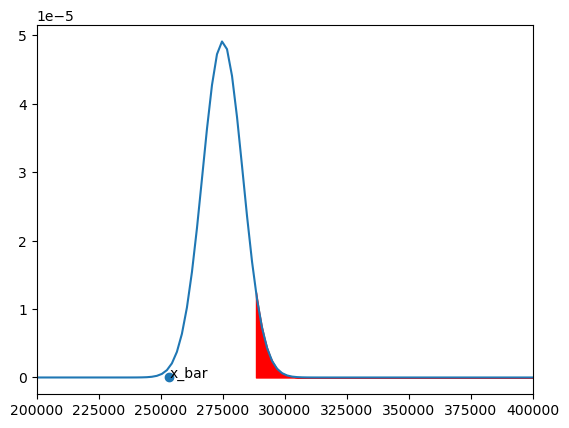

In [324]:
x_min=200000
x_max=400000

mean=pop_mean
std=sample_std/(sample_size**0.5)

x=np.linspace(x_min,x_max,100)
y=norm.pdf(x,mean,std)
plt.xlim(x_min,x_max)
plt.plot(x,y)

t_critical_right=pop_mean+(t_critical*std)

x1=np.linspace(t_critical_right,x_max,100)
y1=norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='red')

plt.scatter(sample_mean,0)
plt.annotate('x_bar',(sample_mean,0))
plt.show()

In [327]:
print(t)
print(t_critical)


if(t>t_critical):
    
    print('Reject Null hypothesis')
else:
    print('Failed to Reject Null hypothesis')

-2.637600737677538
1.6563045418965052
Failed to Reject Null hypothesis


In [328]:
p_value=1-norm.cdf(t)
print('p_value=',p_value)
if(p_value<alpha):
    print('Reject Null hypothesis')
else:
    print("Fail to reject null hypothesis")

p_value= 0.9958252588888086
Fail to reject null hypothesis


`Insight`

The claim stated by the Times of India regarding the salary of computer Science Engineering students in the roles like Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer as fresher can earn 2.5-3 lakhs is true. 
The Null hypothesis given by the Times of India can be considered.

In [331]:
contingency_table = pd.crosstab(df1['Specialization'],df1['Gender'])
contingency_table


Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


In [345]:
chi2_contingency(contingency_table)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [346]:
chi2_test_stat=chi2_contingency(contingency_table)[0]
pval=chi2_contingency(contingency_table)[1]
df=chi2_contingency(contingency_table)[2]

In [348]:
confidence_level=0.95
alpha=1-confidence_level
chi2_critical=chi2.ppf(1-alpha,df)
chi2_critical

61.65623337627955

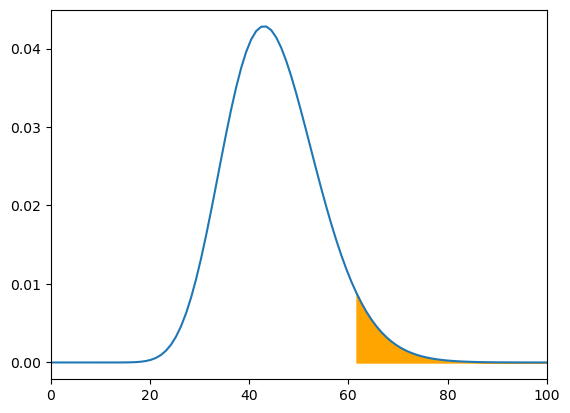

In [349]:
x_min=0
x_max=100

x=np.linspace(x_min,x_max,100)
y=chi2.pdf(x,df)
plt.xlim(x_min,x_max)
plt.plot(x,y)

chi2_critical_right=chi2_critical

x1=np.linspace(chi2_critical_right,x_max,100)
y1=chi2.pdf(x1,df)
plt.fill_between(x1,y1,color='orange')
plt.show()

In [351]:
if(chi2_test_stat>chi2_critical):
    print('Reject Null hypothesis:There is a relationship between gender and Specialization')
else:
    print("Failed to reject null hypothesis")


Reject Null hypothesis:There is a relationship between gender and Specialization


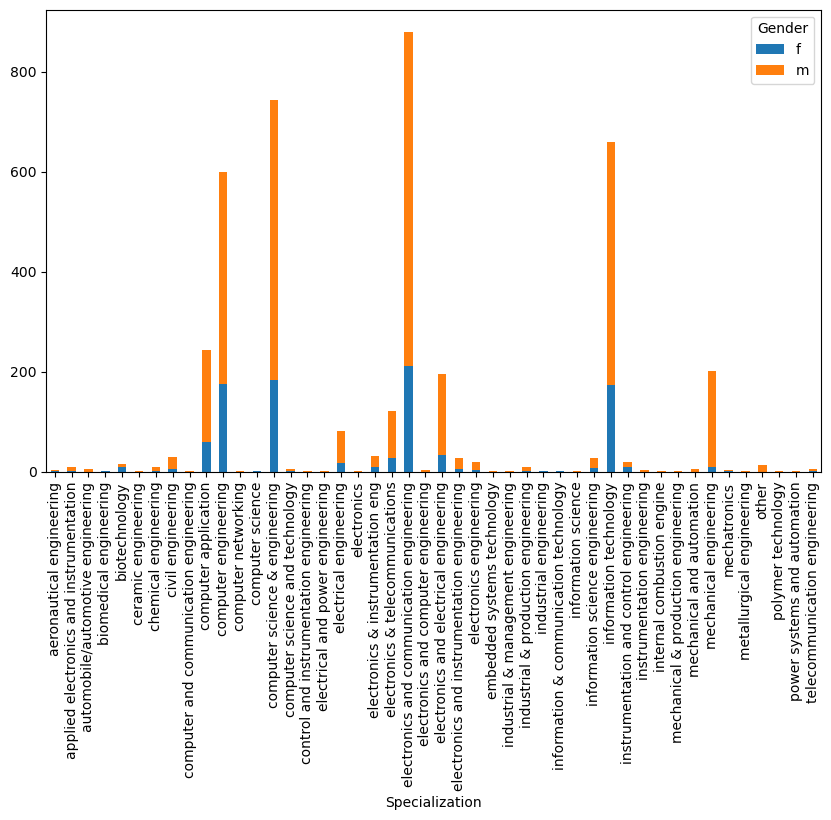

In [352]:
contingency_table.plot(kind='bar',stacked=True,figsize=(10,6))
plt.show()

`Insight`

There is a relationship between the Gender and the Specialization. There are more number of females in the specializations related to software industry compared to the hardware. The female count is very less in hardware branches, and male count is high in both software and hardware branches.

## Conclusion

From the analysis done on Aspiring minds employees , the salaries of the employees is varying based on different features. The salary of most of the employees is below 5lakhs, The maximum number of employees are from Btech and Software Background. In the company, there is a domination of male count over female count. The salary of employees is not depending on any of their 10th or 12th grades and also the test scores conducted by the company in each domain. The salary is varying based on the designation, specialization, their Degree. The employees with MTech degree has the higher salary compared to other degrees.On top of all male employees has the higher salaries compared to female employees.